<a href="https://colab.research.google.com/github/ouafighizlene21/Student_Score_Prediction.ipynb/blob/main/Student_Score_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 📚 Importation des librairies nécessaires
## Ce bloc contient toutes les bibliothèques utiles pour manipuler les données,
## visualiser les résultats et créer nos modèles de régression.

## 📚 Importing required libraries
## This block includes all the essential libraries to handle data,
## visualize results, and build our regression models.

In [1]:
# Import des librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


## 💾 Chargement du fichier depuis votre ordinateur
## Cette commande ouvre une fenêtre pour téléverser (uploader) un fichier local,
## comme votre dataset téléchargé depuis Kaggle (ex: archive.zip).
## 💾 Uploading the file from your computer
## This command opens a window to upload a local file,
## such as your dataset downloaded from Kaggle (e.g., archive.zip).


In [65]:
from google.colab import files
uploaded = files.upload()


Saving archive.zip to archive (1).zip


In [66]:
import zipfile

# Décompression du fichier archive.zip
with zipfile.ZipFile("archive.zip", 'r') as zip_ref:
    zip_ref.extractall("data")

print("✅ Fichiers extraits dans le dossier 'data'")


✅ Fichiers extraits dans le dossier 'data'


## 📂 Vérification du contenu du dossier 'data'
## Cette commande permet d'afficher la liste des fichiers extraits ou disponibles dans le dossier.
##
## 📂 Checking the content of the 'data' folder
## This command displays the list of extracted or available files inside the folder.


In [67]:
import os
print(os.listdir("data"))


['StudentPerformanceFactors.csv']


## 📊 Chargement du dataset dans un DataFrame pandas
## Ici, on lit le fichier CSV contenant les données sur la performance des étudiants.
## Remplace le nom du fichier par celui affiché lors de la vérification du dossier.
## 📊 Loading the dataset into a pandas DataFrame
## Here we read the CSV file containing the student performance data.
## Replace the filename with the one shown when checking the folder content.

In [68]:
import pandas as pd

# Remplace ici par le vrai nom du fichier affiché
df = pd.read_csv("data/StudentPerformanceFactors.csv")

# Aperçu du dataset
df.head()


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


## 🔍 Aperçu général du dataset  
## Cette section permet d’obtenir une première idée de la taille, des types de variables  
## et des statistiques descriptives du jeu de données.  

## 🔍 General overview of the dataset  
## This section provides an initial look at the dataset’s size, variable types,  
## and basic descriptive statistics.


In [69]:
# Aperçu général
print(df.shape)
print(df.info())
print(df.describe())

(6607, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-

In [71]:
# Vérifier les valeurs manquantes
print(df.isnull().sum())



Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level       0
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64


## 🧹 Traitement des valeurs manquantes (NA)  
## Ici, on remplace les valeurs manquantes des colonnes "Parental_Education_Level",  
## "Teacher_Quality" et "Distance_from_Home" par la valeur la plus fréquente (mode).  
## Cela permet de garder la cohérence des données sans supprimer de lignes.  
## 🧹 Handling missing values (NA)  
## Here, missing values in the columns "Parental_Education_Level",  
## "Teacher_Quality", and "Distance_from_Home" are replaced with the most frequent value (mode).  
## This keeps the dataset consistent without deleting any rows.


In [70]:
df["Parental_Education_Level"].fillna(df["Parental_Education_Level"].mode()[0], inplace=True)


/tmp/ipython-input-70237774.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Parental_Education_Level"].fillna(df["Parental_Education_Level"].mode()[0], inplace=True)


In [73]:
df["Teacher_Quality"].fillna(df["Teacher_Quality"].mode()[0], inplace=True)


/tmp/ipython-input-2539481264.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Teacher_Quality"].fillna(df["Teacher_Quality"].mode()[0], inplace=True)


In [72]:
df["Distance_from_Home"].fillna(df["Distance_from_Home"].mode()[0], inplace=True)


/tmp/ipython-input-2521176608.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Distance_from_Home"].fillna(df["Distance_from_Home"].mode()[0], inplace=True)


In [54]:
# Removing missing values
# Supprimer ou remplir les valeurs manquantes
df = df.dropna()

## 📈 Visualisation de la relation entre les heures d’étude et le score à l’examen  
## Ce graphique permet de voir si plus d’heures d’étude sont associées à un meilleur score.  
## 📈 Visualizing the relationship between study hours and exam score  
## This plot helps observe whether more study hours are linked to higher exam performance.


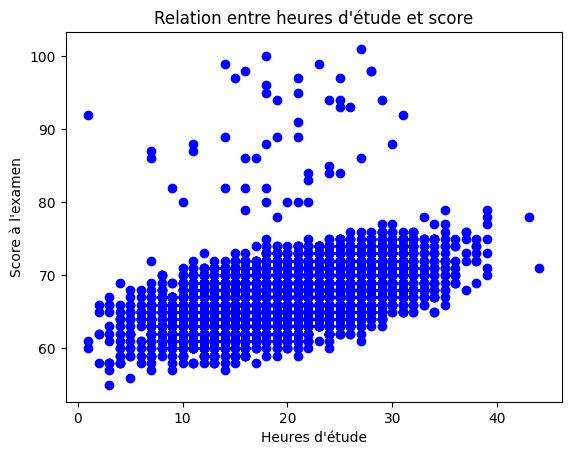

In [56]:
# Visualiser quelques relations
plt.scatter(df["Hours_Studied"], df["Exam_Score"], color='blue')
plt.title("Relation entre heures d'étude et score")
plt.xlabel("Heures d'étude")
plt.ylabel("Score à l'examen")
plt.show()

## 🧩 Première version : prise en compte de **toutes les variables**  
## Ici, on utilise toutes les colonnes du dataset (sauf `Exam_Score`) comme variables explicatives.  
## Cela permet d'exploiter un maximum d'informations, mais certaines variables peuvent être inutiles ou bruitées.  
##
## 🧩 First version: using **all features**  
## Here, all columns (except `Exam_Score`) are used as predictors.  
## This approach leverages all available information, though some variables might add noise.


In [37]:
X = df.drop("Exam_Score", axis=1)
X = pd.get_dummies(X, drop_first=True)
y = df["Exam_Score"]


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [40]:
print(X.dtypes)


Hours_Studied                            int64
Attendance                               int64
Sleep_Hours                              int64
Previous_Scores                          int64
Tutoring_Sessions                        int64
Physical_Activity                        int64
Parental_Involvement_Low                  bool
Parental_Involvement_Medium               bool
Access_to_Resources_Low                   bool
Access_to_Resources_Medium                bool
Extracurricular_Activities_Yes            bool
Motivation_Level_Low                      bool
Motivation_Level_Medium                   bool
Internet_Access_Yes                       bool
Family_Income_Low                         bool
Family_Income_Medium                      bool
Teacher_Quality_Low                       bool
Teacher_Quality_Medium                    bool
School_Type_Public                        bool
Peer_Influence_Neutral                    bool
Peer_Influence_Positive                   bool
Learning_Disa

## 📈 Régression Linéaire — Entraînement et Évaluation  
## On crée et entraîne un modèle de régression linéaire sur les données d’entraînement.  
## Puis, on prédit les scores des étudiants sur les données de test et on évalue la performance du modèle.  
##  
## Les deux métriques affichées sont :  
## 🔹 **R² (coefficient de détermination)** : indique la qualité de la prédiction (proche de 1 = très bon modèle).  
## 🔹 **MSE (Mean Squared Error)** : mesure l’erreur moyenne au carré (plus petit = meilleur).  
##
## 📈 Linear Regression — Training and Evaluation  
## We create and train a linear regression model on the training data.  
## Then we predict student exam scores on the test data and evaluate the model’s performance.  
##  
## The two displayed metrics are:  
## 🔹 **R² (coefficient of determination)**: shows how well the model explains the variance (closer to 1 = better).  
## 🔹 **MSE (Mean Squared Error)**: measures the average squared prediction error (lower = better).


In [41]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred_linear = lin_reg.predict(X_test)

# Évaluation
print("Linear Regression R2:", r2_score(y_test, y_pred_linear))
print("Linear Regression MSE:", mean_squared_error(y_test, y_pred_linear))


Linear Regression R2: 0.7696495724907312
Linear Regression MSE: 3.2560199870428943


## 🔢 Régression Polynomiale — Extension du modèle linéaire  
## On crée un modèle polynomial pour capturer des relations non linéaires entre les variables.  
## Ici, on utilise un **polynôme de degré 2**, ce qui permet d’ajouter des termes comme X² ou X₁·X₂.  
## Le pipeline (`make_pipeline`) enchaîne automatiquement la transformation polynomial → régression linéaire.  
##  
## Ensuite, on évalue la performance du modèle comme précédemment avec :  
## 🔹 **R²** : plus il est proche de 1, mieux le modèle explique la variance.  
## 🔹 **MSE** : plus il est bas, plus les prédictions sont précises.  
##
## 🔢 Polynomial Regression — Extending the linear model  
## We create a polynomial model to capture non-linear relationships between variables.  
## Here, we use a **2nd-degree polynomial**, adding terms like X² or X₁·X₂.  
## The pipeline (`make_pipeline`) automatically chains polynomial transformation → linear regression.  
##  
## Then, we evaluate the model’s performance as before using:  
## 🔹 **R²**: closer to 1 means better fit.  
## 🔹 **MSE**: lower means better accuracy.


In [42]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Création d'un modèle polynomial (exemple : degré 2)
poly_reg = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_reg.fit(X_train, y_train)

# Prédictions
y_pred_poly = poly_reg.predict(X_test)

# Évaluation
print("Polynomial Regression R2:", r2_score(y_test, y_pred_poly))
print("Polynomial Regression MSE:", mean_squared_error(y_test, y_pred_poly))


Polynomial Regression R2: 0.7471205766472764
Polynomial Regression MSE: 3.5744689760352997


## ⚖️ Comparaison des performances entre les deux modèles  
## On affiche ici les métriques **R²** et **MSE** pour comparer la régression linéaire  
## et la régression polynomiale (degré 2).  
##  
## 🔹 Si le **R²** est plus élevé, le modèle explique mieux les variations du score.  
## 🔹 Si le **MSE** est plus faible, les prédictions sont plus précises.  
##  
## ⚖️ Comparing the performance of both models  
## We display **R²** and **MSE** metrics to compare Linear Regression  
## and Polynomial Regression (degree 2).  
##  
## 🔹 Higher **R²** → better model fit.  
## 🔹 Lower **MSE** → more accurate predictions.


In [44]:
print("Comparaison des modèles :")
print(f"Linear Regression  -> R2: {r2_score(y_test, y_pred_linear):.3f}, MSE: {mean_squared_error(y_test, y_pred_linear):.3f}")
print(f"Polynomial (deg=2) -> R2: {r2_score(y_test, y_pred_poly):.3f}, MSE: {mean_squared_error(y_test, y_pred_poly):.3f}")


Comparaison des modèles :
Linear Regression  -> R2: 0.770, MSE: 3.256
Polynomial (deg=2) -> R2: 0.747, MSE: 3.574


## 📊 Visualisation des prédictions des modèles  
## Ce graphique compare les prédictions de la régression linéaire et polynomiale (degré 2)  
## avec les valeurs réelles des scores d'examen.  
## La ligne rouge en pointillé représente la situation idéale où la prédiction = valeur réelle.  
##  
## 🔹 Points proches de la ligne rouge → bonnes prédictions  
## 🔹 Écarts importants → erreurs du modèle  
##
## 📊 Visualization of model predictions  
## This plot compares the predictions from Linear Regression and Polynomial Regression (degree 2)  
## with the actual exam scores.  
## The red dashed line represents the ideal case where prediction = actual value.  
##
## 🔹 Points close to the red line → accurate predictions  
## 🔹 Large deviations → model errors


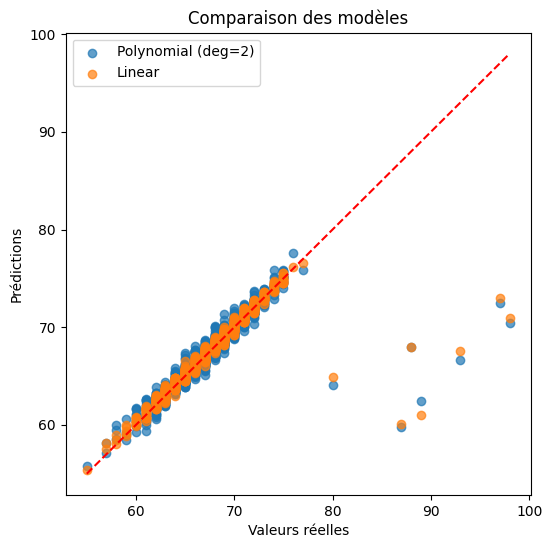

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_poly, label="Polynomial (deg=2)", alpha=0.7)
plt.scatter(y_test, y_pred_linear, label="Linear", alpha=0.7)

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Valeurs réelles")
plt.ylabel("Prédictions")
plt.legend()
plt.title("Comparaison des modèles")
plt.show()


## 🧩 Deuxième version : sélection de variables  
## Ici, on utilise seulement certaines colonnes comme prédicteurs : "Hours_Studied", "Sleep_Hours" et "Attendance".  
## Le reste du processus (train/test split, entraînement des modèles, évaluation) reste identique à la première version.  
##
## 🧩 Second version: feature selection  
## Here, only specific columns are used as predictors: "Hours_Studied", "Sleep_Hours", and "Attendance".  
## The rest of the process (train/test split, model training, evaluation) is the same as the first version.


In [74]:
X = df[["Hours_Studied", "Sleep_Hours", "Attendance"]]
y = df["Exam_Score"]

# Division en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [75]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_linear = lin_reg.predict(X_test)


In [76]:
print("Linear Regression R2:", r2_score(y_test, y_pred_linear))
print("Linear Regression MSE:", mean_squared_error(y_test, y_pred_linear))


Linear Regression R2: 0.5884110279740731
Linear Regression MSE: 5.817839948697


In [77]:
poly_reg = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_reg.fit(X_train, y_train)
y_pred_poly = poly_reg.predict(X_test)

print("Polynomial Regression R2:", r2_score(y_test, y_pred_poly))
print("Polynomial Regression MSE:", mean_squared_error(y_test, y_pred_poly))


Polynomial Regression R2: 0.5876431312711112
Polynomial Regression MSE: 5.8286942242451865


In [78]:
print(f"Linear Regression  -> R2: {r2_score(y_test, y_pred_linear):.3f}, MSE: {mean_squared_error(y_test, y_pred_linear):.3f}")
print(f"Polynomial (deg=2) -> R2: {r2_score(y_test, y_pred_poly):.3f}, MSE: {mean_squared_error(y_test, y_pred_poly):.3f}")


Linear Regression  -> R2: 0.588, MSE: 5.818
Polynomial (deg=2) -> R2: 0.588, MSE: 5.829


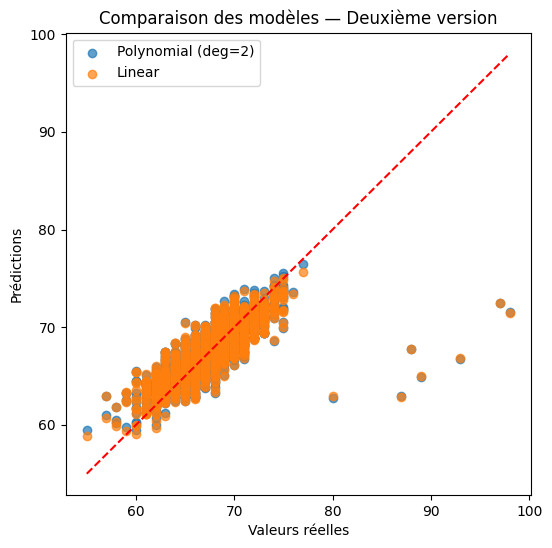

In [79]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_poly, label="Polynomial (deg=2)", alpha=0.7)
plt.scatter(y_test, y_pred_linear, label="Linear", alpha=0.7)

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Valeurs réelles")
plt.ylabel("Prédictions")
plt.legend()
plt.title("Comparaison des modèles — Deuxième version")
plt.show()
